# case Study for Statistical Methods

In [38]:
# import Libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA

# Chi Square Test

Assume the expected distribution is 50% Vegetarians and 50% non-Vegetarians.
You want to test if your sample data matches this distribution.

Goodness of fit model.

In [39]:
import numpy as np
from scipy.stats import chisquare

# hypothetical observed frequencies
observed_frequencies = np.array([30, 70]) # e.g, 30 vegetarians, 70 non-vegetarians
# expected frequencies (assuming a 50-50 distribution)
total_meals = observed_frequencies.sum()
expected_frequencies = np.array([total_meals * 0.5, total_meals * 0.5])
# perform chi-square test
chi2_stat, p_val = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)
# print results
print('Chi-square statistic:', chi2_stat)
print('p-value:', p_val)
# print results in if else
if p_val < 0.05:
    print('Reject null hypothesis: there is a significant difference between the observed and expected frequencies')        
else:
    print('Fail to reject null hypothesis: observed and expected frequencies are similar')
    

Chi-square statistic: 16.0
p-value: 6.334248366623988e-05
Reject null hypothesis: there is a significant difference between the observed and expected frequencies


In [40]:
import numpy as np  
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# load data
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
# create contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])
contingency_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [42]:
# perform the chi square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
# print results
print('Chi-square statistic:', chi2_stat)   
print('p-value:', p_val)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)
# print results in if else
if p_val < 0.05:
    print('Reject null hypothesis: there is a significant relationship between')
else:
    print('Fail to reject null hypothesis: there is no significant relationship between')

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 1
Expected frequencies: [[59.84016393 97.15983607]
 [33.15983607 53.84016393]]
Fail to reject null hypothesis: there is no significant relationship between


---
# t-test

### 1. One Sample t-test

In [43]:
# one sample t-test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

# load data
df = sns.load_dataset('tips')

# Normalize data using shapiro test

# normalize data using shapiro test because  one sample t-test which must be normal


<Axes: xlabel='total_bill', ylabel='Count'>

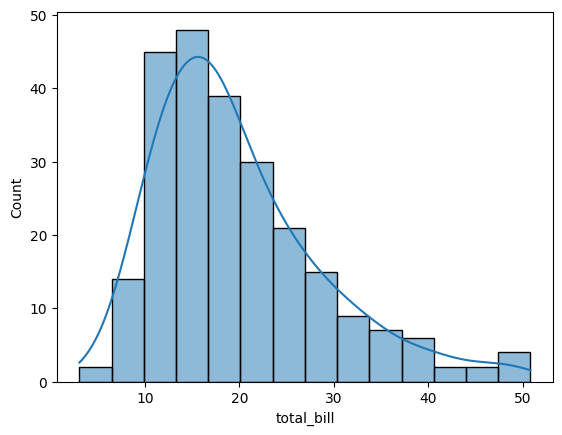

In [44]:
# create a= histogram to confirm its normal or not
sns.histplot(df['total_bill'], kde=True)

It looks normal but we check by shapiro test

In [48]:
from scipy.stats import shapiro

# shapiro test to check normality of the data
statistics, p = shapiro(df['total_bill'])
# print results based on p value and if else condition
if p > 0.05:
    print('Fail to reject null hypothesis: data is normally distributed')   
else:
    print('Reject null hypothesis: data is not normally distributed')

Reject null hypothesis: data is not normally distributed


Its saying data is not normally distributed becaues if we check in histogram data is moving to the right side.

# importing titanic data and work on it if its normally distributed

In [50]:
# one sample t-test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

# load data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

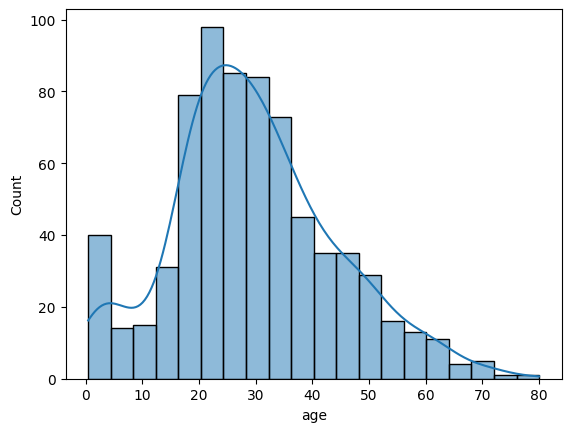

In [51]:
sns.histplot(df['age'], kde=True)

Its kind of normally distributed

In [53]:
from scipy.stats import shapiro

# shapiro test to check normality of the data
statistics, p = shapiro(df['age'])
# print results based on p value and if else condition
if p > 0.05:
    print('Fail to reject null hypothesis: data is normally distributed')   
else:
    print('Reject null hypothesis: data is not normally distributed')

Reject null hypothesis: data is not normally distributed


mu = 35
is there any difference between ages of people and mu?

In [54]:
# check age column based on other column using base column or mu
stats. ttest_1samp(df['age'], 30)

C:\Users\Raja Asher\AppData\Local\Temp\ipykernel_16708\1110928654.py:2: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  stats. ttest_1samp(df['age'], 30)


TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))

There are null values in the data so its giving nan
so we impute them

In [ ]:
# impute null values using median
